# Bynary tree algorithm

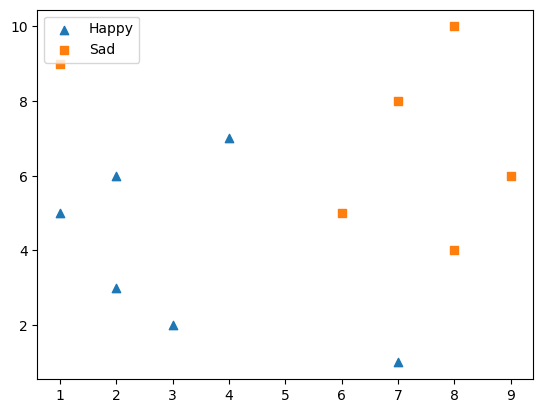

In [8]:
import _plotting

from matplotlib import pyplot as plt
import pandas
import sklearn.tree

dict_data = {
    'x_0':[7,3,2,1,2,4,1,8,6,7,8,9],
    'x_1':[1,2,3,5,6,7,9,10,5,8,4,6],
    'y': [0,0,0,0,0,0,1,1,1,1,1,1]
    }
data = pandas.DataFrame(dict_data)

columns_features = ['x_0', 'x_1']
features = data[columns_features].values
labels = data['y'].values

# Plot the original set
_plotting.plot_scatter(data['x_0'][labels == 0], data['x_1'][labels == 0], marker = '^')
_plotting.plot_scatter(data['x_0'][labels == 1], data['x_1'][labels == 1], marker = 's')
plt.legend(["Happy", "Sad"])


Score: 1.0


[Text(0.5, 0.8333333333333334, 'x_0 <= 5.0\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.25, 0.5, 'x_1 <= 8.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x_1 <= 2.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

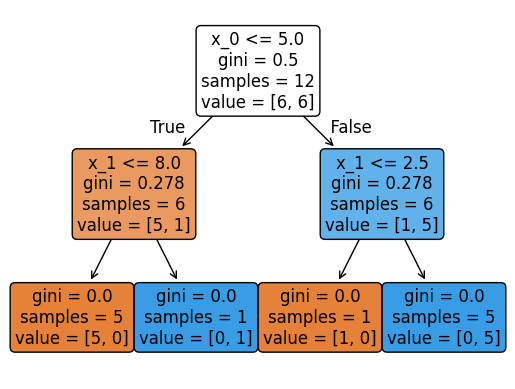

In [9]:
# Building a decision tree using Gini index

decision_tree = sklearn.tree.DecisionTreeClassifier() # Defaults to gini index
decision_tree.fit(features, labels)
score = decision_tree.score(features, labels)

print(f"Score: {score}")

sklearn.tree.plot_tree(decision_tree, feature_names=columns_features, filled=True, rounded=True)


c:\Users\luis.bolanoss\Documents\Labs\repositories\supervised-machine-learning\notebooks\models\decision_trees\_plotting.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


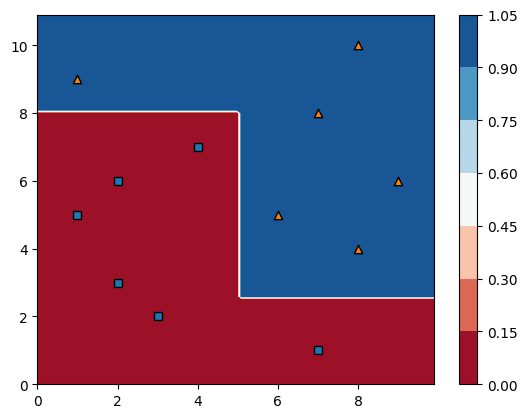

In [10]:
_plotting.plot_decision_boundary_2D(features, labels, decision_tree)

Score: 1.0


[Text(0.5, 0.8333333333333334, 'x_0 <= 5.0\nentropy = 1.0\nsamples = 12\nvalue = [6, 6]'),
 Text(0.25, 0.5, 'x_1 <= 8.0\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x_1 <= 2.5\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]')]

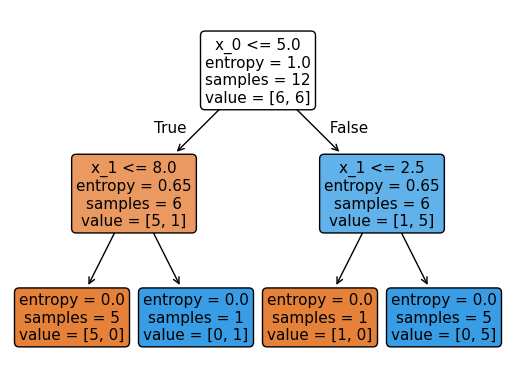

In [11]:
# Building a decision tree using entropy

decision_tree_entropy = sklearn.tree.DecisionTreeClassifier(criterion='entropy')
decision_tree_entropy.fit(features, labels)
score = decision_tree_entropy.score(features, labels)

print(f"Score: {score}")

sklearn.tree.plot_tree(decision_tree_entropy, feature_names=columns_features, filled=True, rounded=True)


c:\Users\luis.bolanoss\Documents\Labs\repositories\supervised-machine-learning\notebooks\models\decision_trees\_plotting.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


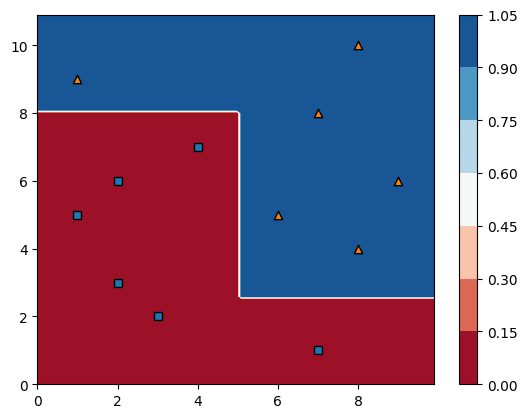

In [12]:
_plotting.plot_decision_boundary_2D(features, labels, decision_tree_entropy)


Score: 1.0


[Text(0.5, 0.75, 'x_0 <= 5.0\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(0.25, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.625, 0.5, '  False')]

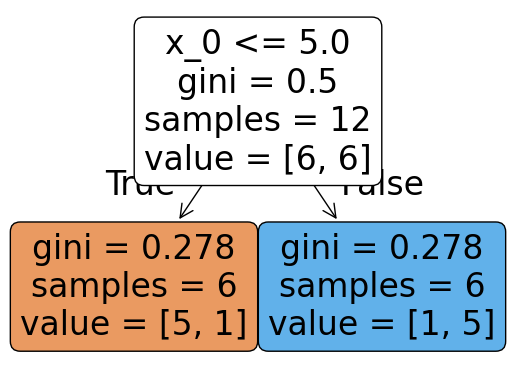

In [13]:
# Building a decision tree of depth one (a vertical or horizontal line)

decision_tree_depth_1 = sklearn.tree.DecisionTreeClassifier(max_depth=1)
decision_tree_depth_1.fit(features, labels)
decision_tree_depth_1.score(features, labels)

print(f"Score: {score}")

sklearn.tree.plot_tree(decision_tree_depth_1, feature_names=columns_features, filled=True, rounded=True)


c:\Users\luis.bolanoss\Documents\Labs\repositories\supervised-machine-learning\notebooks\models\decision_trees\_plotting.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


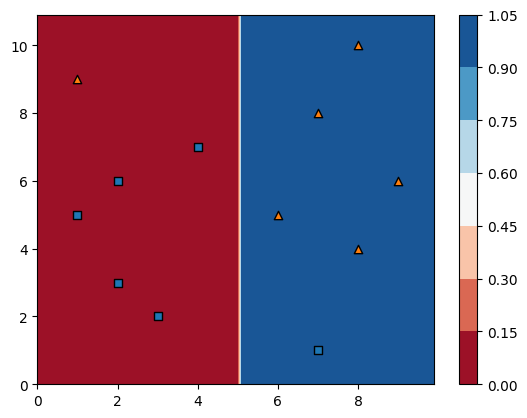

In [14]:
_plotting.plot_decision_boundary_2D(features, labels, decision_tree_depth_1)


Gini = 1 - ∑(p_i)^2

Gini = 1 - (0.5^2 + 0.5^2)
     = 1 - (0.25 + 0.25)
     = 1 - 0.5
     = 0.5

Entropy = - ∑ p_i * log2(p_i)

Entropy = - (0.5 * log2(0.5) + 0.5 * log2(0.5))
        = - (0.5 * -1 + 0.5 * -1)
        = - (-0.5 - 0.5)
        = 1.0


- Ambos valores indican máxima impureza (es decir, la peor mezcla posible).

- Pero la entropía escala entre 0 y 1 (para dos clases), mientras que Gini va de 0 a 0.5 en el caso binario.

- No hay contradicción, solo diferente escala y fórmula.